## Metody klasyfikacji i redukcji wymiaru

### Zastosowanie algorytmu EM do uproszczonej wersji znajdowania motywów w ciągach DNA

Błażej Wiórek, Zofia Dziedzic

#### Opis problemu

Obserwujemy wektor losowy $\mathbf{X} = (X_1, X_2, \ldots, X_w)$, taki że $X_1, X_2, \ldots, X_w$ są niezależne o rozkładzie

$$
    p(x_i; \mathbf{\theta_i}) = \theta_{1i}\mathbb{1}_{\{1\}}(x_i) + \theta_{2i}\mathbb{1}_{\{2\}}(x_i) + \theta_{3i}\mathbb{1}_{\{3\}}(x_i) + \theta_{4i}\mathbb{1}_{\{4\}}(x_i),
$$

gdzie $\mathbf{\theta_i} = (\theta_{1i}, \theta_{2i}, \theta_{3i}, \theta_{4i})^T$. Oznacza to, że zmienne $X_i$, $i \in \{1,2,\ldots,w\}$ przyjmują wartości ze zbioru $\{1,2,3,4\}$ odpowiednio z prawdopodobieństwami $\theta_{1i}, \theta_{2i}, \theta_{3i}, \theta_{4i}$. Wobec tego

$$
    p(\mathbf{x}; \mathbf{\theta}) = \prod_{i=1}^{w} p(x_i; \mathbf{\theta_i}).
$$

Naszym zadaniem będzie modelowanie tego wektora w sytuacji, gdy $\mathbf{\theta_i}, i = 1, 2, \ldots, w$ może przyjmować jedną z dwóch postaci

$$
    \boldsymbol{\theta^{(0)}_i} = (\theta^{(0)}_{1i}, \theta^{(0)}_{2i}, \theta^{(0)}_{3i}, \theta^{(0)}_{4i})^T,
$$

$$
    \boldsymbol{\theta^{(1)}_i} = (\theta^{(1)}_{1i}, \theta^{(1)}_{2i}, \theta^{(1)}_{3i}, \theta^{(1)}_{4i})^T.
$$

Oznaczmy przez $\mathbf\Theta^{(0)}$ macierz, której elementami są $\theta^{(0)}_{ki}$, $k = 1,2,3,4$ i, analogicznie, $\mathbf\Theta^{(1)} = (\mathbf\theta^{(1)}_1, \theta^{(1)}_2, \ldots, \theta^{(1)}_w)$.
O tym, z którego z rozkładów - $p(\mathbf{x}; \mathbf\theta^{(0)})$ czy $p(\mathbf{x}; \mathbf\theta^{(1)})$ - pochodzi $X$, decyduje inna zmienna losowa, $Z$, która z p-stwem $\alpha_0$ jest równa $0$ i z p-stwem $\alpha_1 = 1 - \alpha_0$ jest równa $1$.
Niech

$$
\mathbf{x}_1 = x_{11}, x_{12}, \ldots, x_{1i}, \ldots, x_{1w} \\
\mathbf{x}_2 = x_{21}, x_{22}, \ldots, x_{2i}, \ldots, x_{2w} \\
\ldots \\
\mathbf{x}_j = x_{j1}, x_{j2}, \ldots, x_{ji}, \ldots, x_{jw} \\
\ldots \\
\mathbf{x}_k = x_{k1}, x_{k2}, \ldots, x_{ki}, \ldots, x_{kw}
$$

będą zaobserwowanymi niezależnymi realizacjami wektora losowego $\mathbf{X}$. Każdej z nich odpowiada $z_j$, $j = 1, \ldots, k$, które decyduje o rozkładzie $X_j$.

W oparciu o daną próbę, ale nie znając wartości $z_1, \ldots, z_k$, chcemy wyestymować parametry $\mathbf{\Theta} = (\mathbf\Theta^{(0)}, \mathbf\Theta^{(1)})$ i $\alpha = (\alpha_0, \alpha_1)$.

#### Funkcja wiarogodności

Parametrów $\hat{\mathbf{\Theta}}$ i $\hat\alpha$ będziemy szukać, maksymalizując logarytm funkcji wiarogodności
$$
l(\mathbf{\Theta},\alpha) = \log L(\mathbf{\Theta}, \alpha) = \sum_{j=1}^k \log p(\mathbf{x_j}, z_j; \mathbf{\Theta}, \alpha) = 
 \sum_{j=1}^k \log (p(\mathbf{x_j}, \mathbf\Theta^{(0)})\alpha_0 + p(\mathbf{x_j}, \mathbf\Theta^{(1)})\alpha_1).
$$

Ponieważ nie jesteśmy w stanie znaleźć estymatorów największej wiarogodności analitycznie, użyjemy w tym celu algorytmu EM, który opisujemy krótko poniżej.

#### Algorytm EM

Idea tej procedury opiera się na fakcie, że dla znanego $\mathbf{z} = (z_1, z_2, \ldots, z_k)^T$ łatwo znaleźć $\hat{\mathbf{\Theta}}$ i $\hat \alpha$. Algorytm składa się więc z następujących dwóch kroków, które po odpowiedniej liczbie iteracji pozwalają skutecznie wyestymować szukane parametry:

   1. **Expectation**
    
   "Zgadnięcie" $\mathbf{z}$, które w praktyce polega na obliczeniu "wag" $\mathbf{w^0} = (w_0^{(1)},\ldots,w_0^{(k)})$, 
   $\mathbf{w^1} = (w^1_{(1)},\ldots,w^1_{(k)})$, takich że
   
   $$
   w^0_{(j)} = \mathbb{P}(z_j = 0|\mathbf{X_j} = \mathbf{x_j}; \mathbf{\Theta}) = 
   \frac{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)})}\alpha_0}{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)})}\alpha_0 + \mathbb{P}(\mathbf{X_j} = 
   \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)})}\alpha_1} =
   \frac{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0}{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0 + \prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}
   $$
   i
    $$
   w^1_{(j)} = \mathbb{P}(z_j = 1|\mathbf{X_j} = \mathbf{x_j}; \mathbf{\Theta}) = 
   \frac{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)})}\alpha_1}
   {\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)}})\alpha_0 
   + \mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)}})\alpha_1} = 
   \frac{\prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0 +
   \prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}.
   $$
   
   2. **Maximization**
   
   Wyliczenie, dla danych $\mathbf{w^0}$ i $\mathbf{w^1}$,
   
   $$ 
   \hat{\theta}^{(0)}_{1i} = \frac{\sum_{j=1}^k w^0_{(j)}\mathbb{1}_{\{1\}}(x_{ji})}{\sum_{j=1}^k w^0_{(j)}},
   $$
   
   $$
   \vdots \\
   \hat{\theta}^{(0)}_{4i} = \frac{\sum_{j=1}^k w^0_{(j)}\mathbb{1}_{\{4\}}(x_{ji})}{\sum_{j=1}^k w^0_{(j)}},
   $$
   
   $$ 
   \hat{\theta}^{(1)}_{1i} = \frac{\sum_{j=1}^k w^1_{(j)}\mathbb{1}_{\{1\}}(x_{ji})}{\sum_{j=1}^k w^1_{(j)}},
   $$
   
   $$
   \vdots \\
   \hat{\theta}^{(1)}_{4i} = \frac{\sum_{j=1}^k w^1_{(j)}\mathbb{1}_{\{4\}}(x_{ji})}{\sum_{j=1}^k w^1_{(j)}},
   $$
   
   $$
   \hat{\alpha}_0 = \frac{1}{k}\sum_{j=1}^k w^0_j,
   $$
   
   $$
   \hat{\alpha}_1 = 1 - \hat{\alpha}_0.
   $$

#### Generowanie danych i implementacja algorytmu

Program, który stworzyliśmy, dla zadanych parametrów $w, k, \mathbf\Theta^{(0)}, \mathbf\Theta^{(1)}$ i wygenerowanego na ich podstawie $\mathbf{X} \in \{1,2,3,4\}^{w\times k}$, oblicza za pomocą EM $\hat{\mathbf{\Theta}}$ i $\hat{\alpha}$. W drugiej wersji, gdy parametr `--estimate_alpha` jest równy `no`, dla zadanego $\alpha$ estymujemy jedynie $\mathbf\Theta^{(0)}, \mathbf\Theta^{(1)}$.

In [13]:
import numpy as np
import random

theta_a = np.random.rand(10*4).reshape((4, 10))
theta_a = theta_a/np.sum(theta_a, axis=0)

theta_b = np.random.rand(10*4).reshape((4, 10))
theta_b = theta_b/np.sum(theta_b, axis=0)

params = {
    "w" : 10,
    "alpha" : 0.5,
    "k" : 10000,
    "Theta" : theta_a.tolist(),
    "ThetaB" : theta_b.tolist()
    }

In [ ]:
def get_data():
    w = params['w']
    k = params['k']
    alpha = params['alpha']

    theta_a = np.array(params['Theta'])
    theta_b = np.array(params['ThetaB'])
    X = np.zeros((k, w))
    for i in range(k):
        distr = theta_a
        if random.random() < alpha:
            distr = theta_b
        X[i, :] = [np.random.choice([1, 2, 3, 4], size=1, p=distr[:, i]) for i in range(w)]

    return {
        "alpha": alpha,
        "X": X
    }

In [4]:
import pandas as pd
from functools import reduce


class AlgorithmStateBase:
    __slots__ = ['theta_a', 'theta_b']

    def __init__(self, theta_a, theta_b):
        self.theta_a = theta_a
        self.theta_b = theta_b

    @staticmethod
    def compare(obj1, obj2, thresh=10e-2):
        theta_a1 = obj1.theta_a.flatten()
        theta_a2 = obj1.theta_a.flatten()
        theta_b1 = obj2.theta_b.flatten()
        theta_b2 = obj2.theta_b.flatten()
        theta_a_norm = np.linalg.norm(theta_a1 - theta_a2) < thresh
        theta_b_norm = np.linalg.norm(theta_b1 - theta_b2) < thresh
        return isinstance(obj1, AlgorithmStateInit) or all(np.array([theta_a_norm, theta_b_norm]) > thresh)


class AlgorithmStateInit(AlgorithmStateBase):

    def __init__(self, w):
        super().__init__(np.zeros((4, w)), np.zeros((4, w)))


class AlgorithmState(AlgorithmStateBase):

    def __init__(self, theta_a, theta_b):
        super().__init__(theta_a, theta_b)

In [5]:
def init_distr(w):
    theta = np.random.rand(4*w).reshape((4, -1))
    theta_sum = np.sum(theta, axis=0)
    return theta/theta_sum

In [6]:
def expectation(X: np.array, alpha, theta_a, theta_b):

    def get_cond_prob(X, theta):
        cond_prob = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            x_i = X[i, :]
            x_i_prob = [theta[j-1, k] for k, j in zip(range(theta.shape[1]), x_i)]
            cond_prob[i] = reduce(lambda x, y: x * y, x_i_prob)
        return cond_prob

    cond_1 = get_cond_prob(X, theta_a)
    cond_2 = get_cond_prob(X, theta_b)
    weights_mtrx = np.vstack((cond_1, cond_2)).T
    alphas = np.array([alpha, 1 - alpha])
    cond_sums = weights_mtrx @ alphas.reshape((2, 1))
    weights_mtrx[:, 0] = (alpha * weights_mtrx[:, 0]) / cond_sums.flatten()
    weights_mtrx[:, 1] = ((1 - alpha) * weights_mtrx[:, 1]) / cond_sums.flatten()

    return weights_mtrx

In [7]:
def alpha_new(X, weights):
    N_k = np.sum(weights, axis=0)
    return 1-(N_k / np.sum(N_k))[0]

In [8]:
def new_theta(X_full, weights_full):

    def get_estimators(k):
        weights = weights_full[:, k]
        estimators = []
        for i in range(X_full.shape[1]):
            labels_pred = [X_full[:, i] == k for k in range(1, 5)]
            label_sums = np.array([np.sum(weights[pred]) for pred in labels_pred])
            estimators.append(label_sums / np.sum(weights))
        return np.array(estimators).T

    estimators_1 = get_estimators(0)
    estimators_2 = get_estimators(1)

    return estimators_1, estimators_2

In [9]:
def init_em(X: pd.Series, w: int):
    alpha = 0.5
    theta_a, theta_b = init_distr(w), init_distr(w)

    alg_state_old = AlgorithmStateInit(w)
    alg_state_new = AlgorithmStateInit(w)
    counter = 1
    while AlgorithmState.compare(alg_state_old, alg_state_new) and counter < 100:
        weights = expectation(X, alpha, theta_a, theta_b)
        # alpha = alpha_new(X, weights)
        theta_a, theta_b = new_theta(X, weights)

        alg_state_old = alg_state_new
        alg_state_new = AlgorithmState(theta_a, theta_b)
        counter += 1

    return theta_a, theta_b, alpha, counter

In [19]:
X = get_data()["X"].astype(int)
theta_a_est, theta_b_est, alpha, counter = init_em(X, 3)

#### Wyniki

Poniżej przedstawiamy wyniki estymacji dla $w=10$, $k=10000$ i $\alpha = 0.5$.

$\mathbf\Theta^{(0)}$

In [28]:
print(np.round(theta_a,3))

[[0.433 0.319 0.268 0.267 0.31  0.563 0.052 0.257 0.364 0.28 ]
 [0.467 0.128 0.25  0.058 0.294 0.197 0.501 0.195 0.309 0.204]
 [0.056 0.487 0.345 0.339 0.04  0.194 0.29  0.359 0.217 0.001]
 [0.044 0.065 0.137 0.336 0.357 0.045 0.157 0.188 0.109 0.515]]


$\hat{\mathbf\Theta}^{(0)}$

In [29]:
print(np.round(theta_a_est,3))

[[0.491 0.213 0.305 0.332 0.405 0.211 0.186 0.242 0.285 0.158]
 [0.174 0.257 0.352 0.162 0.116 0.244 0.327 0.355 0.322 0.279]
 [0.225 0.499 0.182 0.239 0.052 0.248 0.269 0.318 0.114 0.068]
 [0.111 0.031 0.16  0.268 0.427 0.296 0.218 0.085 0.279 0.496]]


$\mathbf\Theta^{(1)}$

In [30]:
print(np.round(theta_b, 3))

[[0.491 0.214 0.308 0.322 0.415 0.195 0.186 0.235 0.284 0.155]
 [0.17  0.246 0.355 0.162 0.116 0.252 0.34  0.357 0.318 0.278]
 [0.22  0.507 0.179 0.261 0.054 0.261 0.263 0.334 0.11  0.065]
 [0.118 0.033 0.158 0.256 0.415 0.292 0.211 0.075 0.288 0.502]]


$\hat{\mathbf\Theta}^{(1)}$

In [31]:
print(np.round(theta_b_est,3))

[[0.424 0.332 0.273 0.256 0.308 0.551 0.056 0.258 0.354 0.289]
 [0.469 0.124 0.241 0.057 0.289 0.208 0.495 0.196 0.315 0.19 ]
 [0.056 0.479 0.351 0.362 0.036 0.193 0.295 0.368 0.218 0.   ]
 [0.05  0.065 0.136 0.325 0.367 0.047 0.154 0.179 0.113 0.521]]


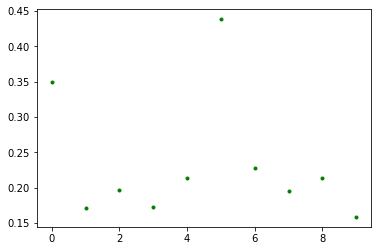

In [44]:
import matplotlib.pyplot as plt

w = params['w']

norms_a = []
norms_b = []

for i in range(w):
    norms_a.append(np.linalg.norm(theta_a.T[i] - theta_a_est.T[i]))
    norms_b.append(np.linalg.norm(theta_b.T[i] - theta_b_est.T[i]))


plt.plot(range(w), norms_a, 'g.')
plt.show()

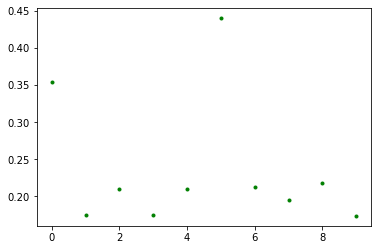

In [45]:
plt.plot(range(w), norms_b, 'g.')
plt.show()